## Theory Questions

**Q1:To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.** 
The model accuracy works well with equal number of samples belonging to each class. Therefore, it may be misleading if our data set is unbalanced .For example, a disease that affects only one person in million. Then the model can get ~100% training accuracy by simply predicting every training sample as 'healthy' .and by this, the model is useless. Therefore, Model performance is more reliable and important for us, using evaluation metrics like sensitivity, specificity, F1 Score.

**Q2:T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.** 
The first case - BP and BMI features:
Advantages:  
•	A model based on 2 features is easy to interpret. 
•	The required computing power and time is smaller.
•	The risk for overfitting and noise is smaller.

Disadvantages:
•	Decreasing the number of the features results in information loss, which could affect the quality of the classification, and by that increasing the errors.

The second case -all the features available:
Advantages:  
•	Using all the features gives better performance because it has more information.
•	Reduction in the number of errors, less chances to get bias. 

Disadvantages:
•	Many features can lead to model overfitting 
•	The model will be less interpretable.
•	The required computing power and time is large. 


**Q3:A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.** 
The nonlinear SVM is better in this case.  The biopsies are very similar and it is difficult to distinguish them from looking at the features, meaning the data is probably not linearly separable. Therefore, using the non-linear SVM will do the job better than the others will. Since the non-linear SVM can transform the data to be linearly separable by finding suitable boundaries to divide them.

**Q4:What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?** 
The SVM is usually more accurate but more complex.it is relied on the best margin that reduces the risk of error on the data, it could be either linear or nonlinear, and more suitable for problem with many features than LR. In addition, SVM is more sensitive to overfitting. The SVM can also work with different loss functions hinge or squared hinge.

The LR is a probabilistic model, which its output is the probability to be in one of two or more classes. It looks to maximize the probability of the data being on the right side of the hyperplane. The LR is linear and relatively simple model.

 Both have a regulation inverse parameter that gives a penalty for making the hyperplane complex, and can use different penalty functions (l1, l2). The gap to minimize in SVM is the orthogonal distance of the points from the hyperplane and in LR the gaps to minimize are according to the points specific axis distance to the hyperplane.


____________________________________________________________________________________________________

## Coding Assignment 

In [30]:
import pandas as pd 
import numpy as np
from pathlib import Path
import random
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
random.seed(10)

import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix, roc_auc_score,plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import hinge_loss

#### **1 . Loading the data & preprocessing**

In [2]:
# load the data
dataset = pd.read_csv('HW2_data.csv')

#Converting the data to binary values
datasetbin= dataset.replace(['No','Yes','Negative', 'Positive', 'Female', 'Male'],[0, 1, 0, 1, 0, 1])

# Removing patients with NAN values since most of the features for this dataset are binary and estimating them could mislead the model.
datasetCLEAN= datasetbin.dropna() 
print(dataset.shape)  # to get the number of rows and columns
print(datasetCLEAN.shape)
print("We have removed 42 patients with NAN values")

datasetCLEAN.sample(n=10, random_state=5)

#print(dataset)
#print(datasetbin)
#print(datasetCLEAN)

(565, 18)
(523, 18)
We have removed 42 patients with NAN values


,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
417,48,0,1,1.0,0.0,1,0.0,0.0,1,1.0,0,1,1,0.0,0,0,1,0
365,50,0,0,0.0,0.0,1,0.0,0.0,1,1.0,0,1,0,0.0,1,0,0,1
198,67,1,0,1.0,0.0,1,1.0,0.0,1,0.0,1,1,1,1.0,1,1,1,0
163,38,1,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,0,0,0,1
221,60,1,0,0.0,0.0,1,0.0,0.0,0,0.0,0,0,1,1.0,0,0,0,1
176,48,0,1,1.0,1.0,0,1.0,1.0,0,0.0,1,1,0,1.0,1,1,1,0
373,39,0,1,1.0,1.0,1,1.0,0.0,0,1.0,1,1,1,0.0,0,0,1,1
275,47,1,1,1.0,0.0,0,0.0,0.0,0,0.0,0,0,0,1.0,0,0,1,0
304,38,1,0,0.0,0.0,0,0.0,0.0,0,0.0,0,0,0,0.0,0,0,0,0
563,46,1,0,0.0,0.0,1,0.0,0.0,0,1.0,0,1,0,0.0,1,0,0,0


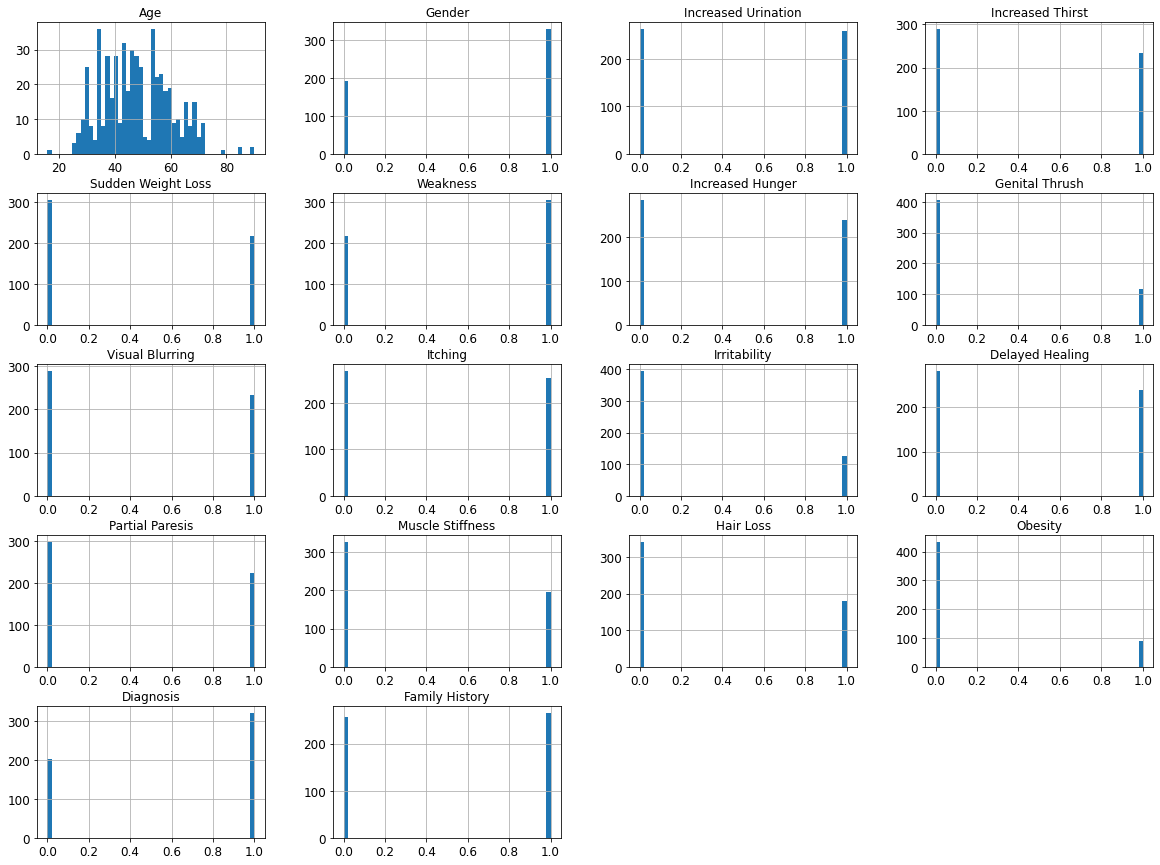

In [3]:
#Check if the dataset is OK & have no Null values 
datasetCLEAN.hist(bins=50, figsize=(20, 15))
plt.show()

#### **2 . Test-train split of 20% test**

In [4]:
diagnosis = datasetCLEAN['Diagnosis']
data_clean=datasetCLEAN.drop(columns=['Diagnosis'])
x_train, x_test, y_train, y_test = train_test_split(data_clean, np.ravel(diagnosis), test_size=0.2, random_state=0,
                                                    stratify=np.ravel(diagnosis))
#print(data_clean)
#print(len(x_train)) #452
#print(len(x_test)) #113
#print(len(y_train)) #452
#print(len(y_test)) #113

#### **3 .Data visualization and exploration** 

## ***a :***

***i.What issues could an imbalance of features between train and test cause?***Imbalance of features between train and test sets could cause a bias of the model and over-fitting, witch can change the model's performance.

***ii.How could you solve the issue?***This issue can be solved by using the stratify option when splitting the data ,witch splitting the train and test with the same ratio of features, thus preventing imbalance of features.

#### An analysis to show that the distribution of the features is similar between test and train :


Positive Feature,Train %,Test %,Delta %
Gender,63.397129,61.904762,1.492367
Increased Urination,49.760766,48.571429,1.189337
Increased Thirst,45.454545,40.952381,4.502165
Sudden Weight Loss,40.909091,43.809524,-2.900433
Weakness,58.373206,59.047619,-0.674413
Increased Hunger,45.693780,44.761905,0.931875
Genital Thrush,22.727273,20.000000,2.727273
Visual Blurring,44.976077,42.857143,2.118934
Itching,49.282297,45.714286,3.568011
Irritability,25.119617,20.952381,4.167236


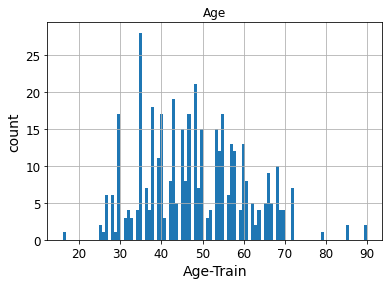

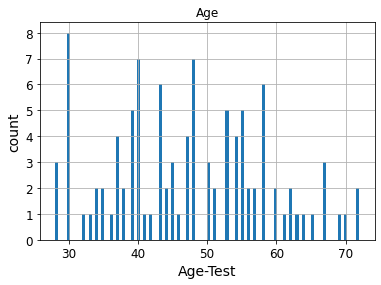

In [31]:
# selecting the relevant features to be displayed (without 'AGE'):
#("Remember --> no,negative,female=0   yes,positive,male=1 ")
distribution_feat = x_train.drop(columns='Age').keys()
distribution_train = x_train.drop(columns='Age').mean()*100
distribution_test = x_test.drop(columns='Age').mean()*100
distribution = {'Positive Feature':distribution_feat, 'Train %':distribution_train, 'Test %':distribution_test, 'Delta %':distribution_train-distribution_test}
distribution_table = pd.DataFrame(distribution)
display(distribution_table.style.hide_index())

#comparing age distribution
x_train[['Age']].hist(bins = 100)
plt.xlabel('Age-Train')
plt.ylabel('count')
plt.show()

x_test[['Age']].hist(bins = 100)
plt.xlabel('Age-Test')
plt.ylabel('count')
plt.show()


## ***b :***

#### Plots to show the relationship between feature and label:

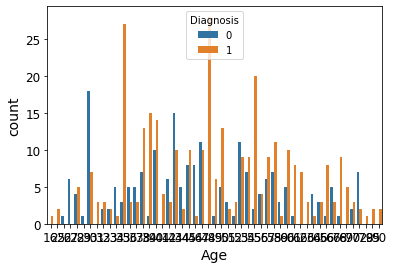

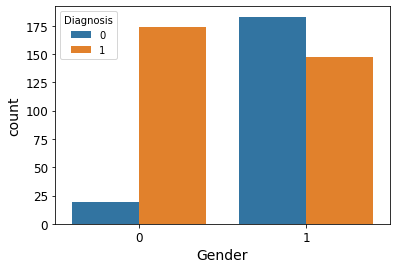

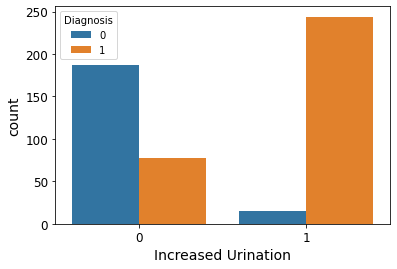

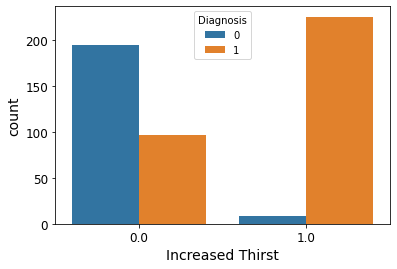

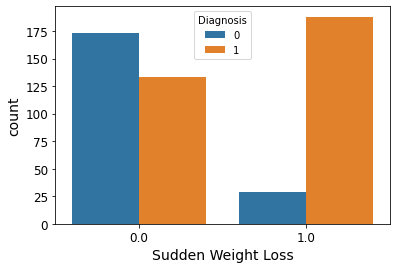

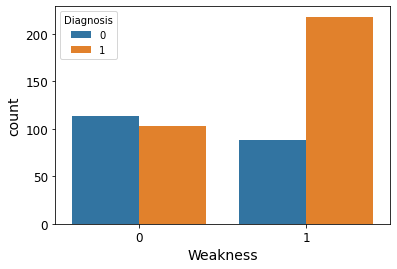

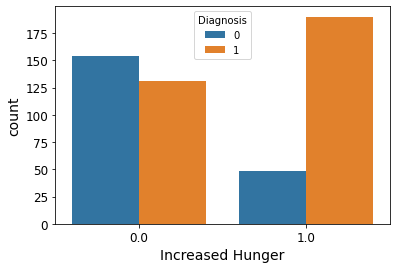

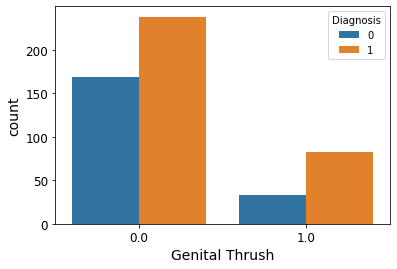

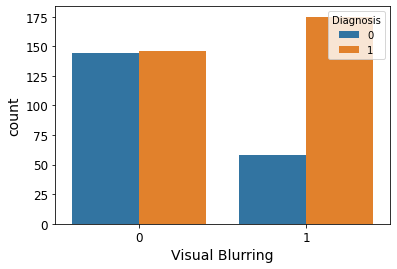

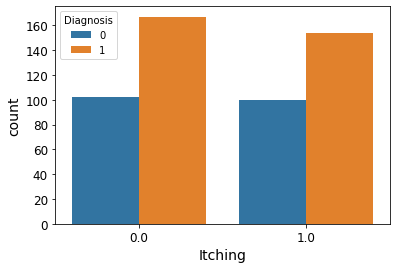

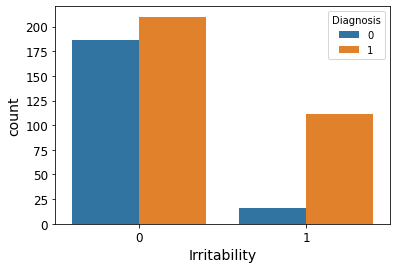

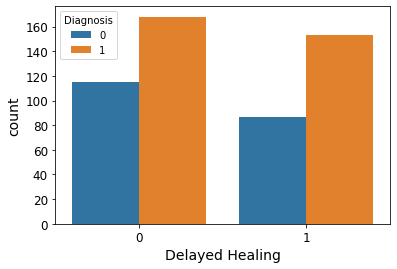

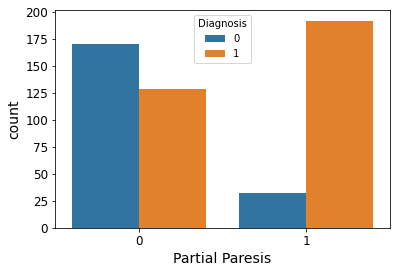

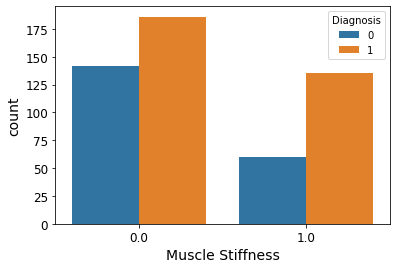

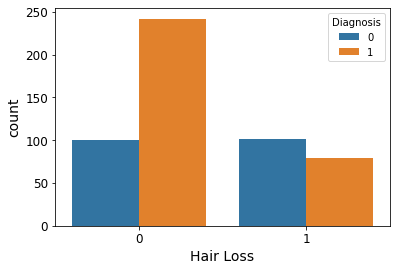

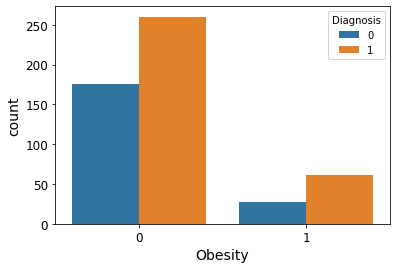

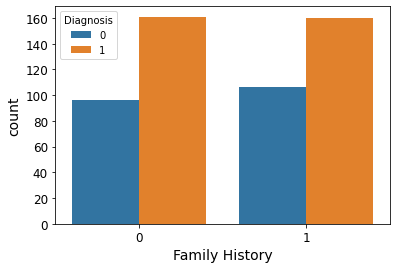

In [32]:
plotdata=datasetCLEAN.copy()
plotdata['Diagnosis']=diagnosis
for feat in data_clean.columns.values:
    ax = sns.countplot(x=feat, hue="Diagnosis", data=plotdata) 
   
    plt.show()

## ***c :***

#### Additional plots that make sense given the mostly binary nature of this dataset:

<AxesSubplot:>

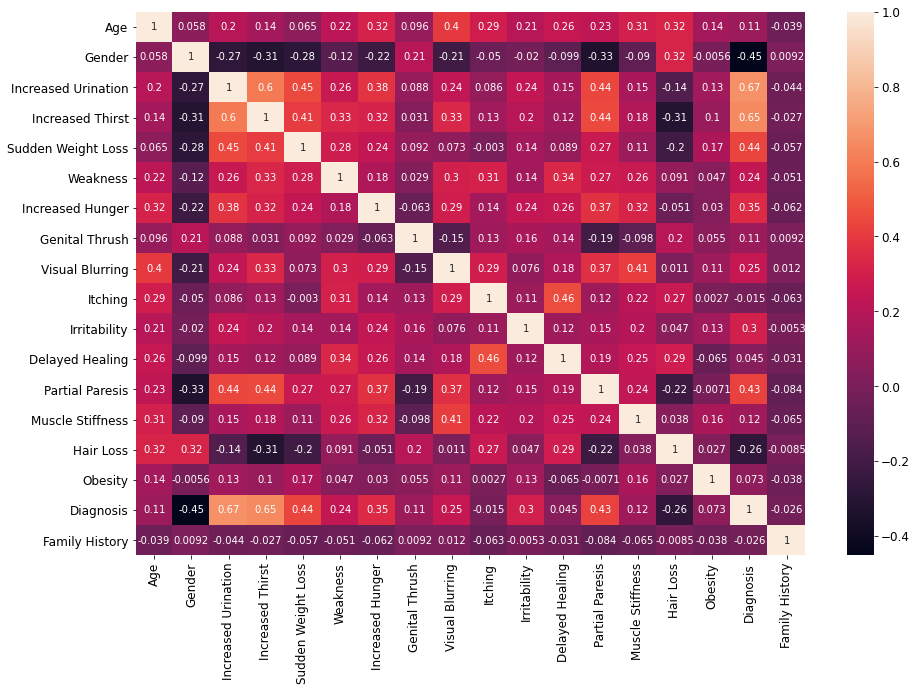

In [33]:
plt.figure(figsize = (15,10))
sns.heatmap(datasetCLEAN.corr(), annot = True)

## ***d :***

#### State any insights you have:
***i. Was there anything unexpected?***
I thought that Family history can be an important factor since anyone with a parent or sibling with type 1 diabetes has a slightly increased risk of developing the condition, but as we can see in the plots it is the same probability of being diabetic even if you have no family history associated with the disease.

***ii. Are there any features that you feel will be particularly important to your
model? Explain why.*** 
as we can see in the plot from section C-- the correlation between diagnosis and increased thirst or urination is hight, thus wwe excpect those features to be particularly important, also it matches what was written in the link. 

####  **4.Converting the data to one hot vector**

In [34]:
hot_vector=datasetCLEAN.copy()
hot_vector['Diagnosis']=pd.get_dummies(data=hot_vector['Diagnosis'],prefix=None,drop_first=True)
diagnosis =hot_vector[['Diagnosis']]
print(diagnosis)

     Diagnosis
0            0
1            0
2            1
3            1
4            1
..         ...
518          1
519          1
562          1
563          0
564          0

[523 rows x 1 columns]


#### **5. Machine Learning Models**

***a. Use 5k cross fold validation and tune the models to achieve the highest test AUC:***

***i. Train one or more linear model on your training set***

***ii. Train one or more non-linear models on your training set***

***b. Report the appropriate evaluation metrics of the train and test sets (AUC, F1, LOSS,
ACC).***

In [36]:
def plot_radar(clf, clf_type):
    labels=np.array(['Accuracy', 'F1', 'PPV', 'Sensitivity', 'AUROC']) 
    score_mat_train = np.stack((clf.cv_results_['mean_train_accuracy'], clf.cv_results_['mean_train_f1'],
                               clf.cv_results_['mean_train_precision'], clf.cv_results_['mean_train_recall'],
                               clf.cv_results_['mean_train_roc_auc']), axis=0)
    score_mat_val = np.stack((clf.cv_results_['mean_test_accuracy'], clf.cv_results_['mean_test_f1'],
                               clf.cv_results_['mean_test_precision'], clf.cv_results_['mean_test_recall'],
                               clf.cv_results_['mean_test_roc_auc']), axis=0)


    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

    angles=np.concatenate((angles,[angles[0]]))
    cv_dict = clf.cv_results_['params']
    fig=plt.figure(figsize=(18,14))
    if 'svm__gamma' in cv_dict[0]:
        new_list = [(i, item) for i, item in enumerate(cv_dict) if
                    item["svm__kernel"] == clf_type[0] and item["svm__gamma"] == clf_type[1]]
    else:
        new_list = [(i, item) for i, item in enumerate(cv_dict) if
                    item["svm__kernel"] == clf_type[0]]
    for idx, val in enumerate(new_list):
        ax = fig.add_subplot(1, len(new_list), 1+idx, polar=True)
        rel_idx, rel_dict = val
        stats_train = score_mat_train[:, rel_idx]
        stats_train=np.concatenate((stats_train,[stats_train[0]]))
        ax.plot(angles, stats_train, 'o-', linewidth=2)
        ax.fill(angles, stats_train, alpha=0.25)
        stats_val = score_mat_val[:, rel_idx]
        stats_val=np.concatenate((stats_val,[stats_val[0]]))
        ax.plot(angles, stats_val, 'o-', linewidth=2)
        ax.fill(angles, stats_val, alpha=0.25)
        ax.set_thetagrids(angles[0:-1] * 180/np.pi, labels)
        if idx == 0:
            ax.set_ylabel(clf_type[0], fontsize=18)
        ax.set_title('C = %.3f' % (rel_dict['svm__C']))
        if 'svm__gamma' in cv_dict[0]:
            ax.set_xlabel('$\gamma = %s $' % (rel_dict['svm__gamma']))
        ax.set_ylim([0,1])
        ax.legend(['Train','Validation'])
        ax.grid(True)
        
    plt.show()

***a+b-i:***

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.814, test=0.857) f1: (train=0.868, test=0.897) precision: (train=0.770, test=0.812) recall: (train=0.995, test=1.000) roc_auc: (train=0.958, test=0.974) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.820, test=0.845) f1: (train=0.871, test=0.883) precision: (train=0.780, test=0.831) recall: (train=0.985, test=0.942) roc_auc: (train=0.965, test=0.941) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.844, test=0.774) f1: (train=0.885, test=0.835) precision: (train=0.810, test=0.750) recall: (train=0.976, test=0.941) roc_auc: (train=0.965, test=0.934) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.824, test=0.819) f1: (train=0.874, test=0.872) precision: (train=0.779, test=0.773) recall: (train=0.995, test=1.000) roc_auc: (train=0.962, test=0.960) total t

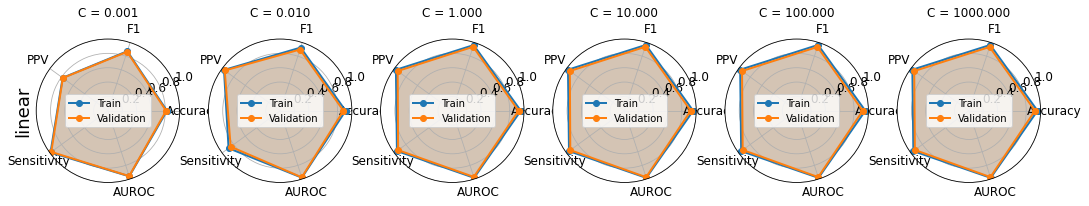

In [37]:
#Linear SVM calssifier

n_splits=5
skf=StratifiedKFold(n_splits=n_splits,random_state=10, shuffle=True) 
svc = SVC(probability=True)
C = np.array([0.001, 0.01, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_lin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['linear']},cv=skf,
                       scoring=['accuracy','f1','precision','recall','roc_auc'], 
                       refit='roc_auc', verbose=3, return_train_score=True)
svm_lin.fit(x_train,y_train)

#best linear model
best_svm_lin = svm_lin.best_estimator_
print(svm_lin.best_params_)

#performances as a function of missclassification penalties
clf_type = ['linear']
plot_radar(svm_lin,clf_type)

In [75]:
calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]

def Evaluation_metrics(model,method,d=x_test):
    y_pred_test = model.predict(d)
    y_pred_proba_test = model.predict_proba(d)
    if method=='log_reg' :
         LOSS=log_loss(y_test,y_pred_test)
    else: #lin_SVM/ non-lin_SVM/ rfc
        y_pred_test_sc=np.where(y_pred_test==0, -1, y_pred_test)
        y_test_sc=np.where(y_test==0, -1, y_test)
        LOSS=hinge_loss(y_test_sc,y_pred_test_sc)

    TN = calc_TN(y_test, y_pred_test)
    TP = calc_TP(y_test, y_pred_test)
    FN = calc_FN(y_test, y_pred_test)
    FP = calc_FP(y_test, y_pred_test)
    Se = TP/(TP+FN)
    Sp = TN/(TN+FP)
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    Acc = (TP+TN)/(TP+TN+FP+FN)
    F1 = (2*PPV*Se)/(PPV+Se)
    print(f'Sensitivity is {Se:.2f}')
    print(f'Specificity is {Sp:.2f}')
    print(f'PPV is {PPV:.2f}')
    print(f'NPV is {NPV:.2f}')
    print(f'Accuracy is {Acc:.2f}')
    print(f'F1 is {F1:.2f}')
    print(f'LOSS is {LOSS:.2f}')
    plot_confusion_matrix(model, d, y_test, cmap=plt.cm.Blues)
    plt.grid(False)
    print('AUROC is {:.3f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))

Sensitivity is 0.89
Specificity is 0.90
PPV is 0.93
NPV is 0.84
Accuracy is 0.90
F1 is 0.91
LOSS is 0.21
AUROC is 0.940


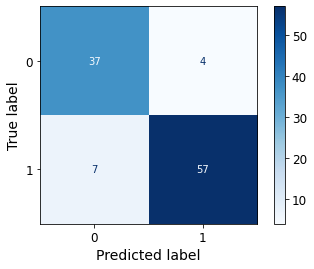

In [62]:
Evaluation_metrics(best_svm_lin,method='lin_SVM')

***a+b-ii:***

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END svm__C=1, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.991, test=0.976) f1: (train=0.993, test=0.981) precision: (train=0.990, test=0.981) recall: (train=0.995, test=0.981) roc_auc: (train=1.000, test=0.998) total time=   0.0s
[CV 2/5] END svm__C=1, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.994, test=0.940) f1: (train=0.995, test=0.949) precision: (train=0.990, test=1.000) recall: (train=1.000, test=0.904) roc_auc: (train=0.999, test=0.986) total time=   0.0s
[CV 3/5] END svm__C=1, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.991, test=0.905) f1: (train=0.993, test=0.920) precision: (train=0.990, test=0.939) recall: (train=0.995, test=0.902) roc_auc: (train=1.000, test=0.983) total time=   0.0s
[CV 4/5] END svm__C=1, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.988, test=0.940) f1: (train=0.990, test=0.952) precision: (train=0.990, test=0.926) recall: (train=0.990, test=0.980) 

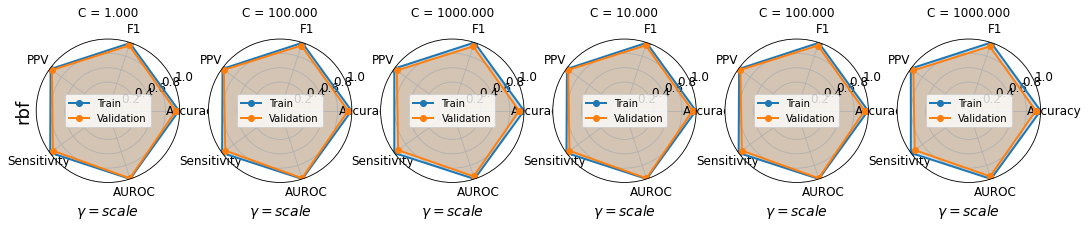

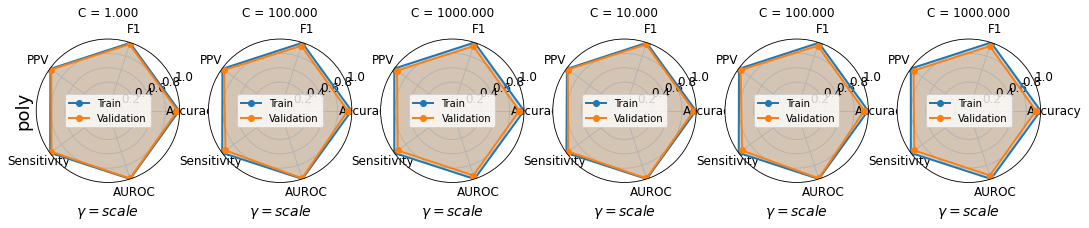

In [64]:
#Nonlinear SVM calssifier

svc = SVC(probability=True)
C = np.array([1, 100, 1000, 10, 100, 1000])

pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_nonlin = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'],
                                                      'svm__gamma': ['auto', 'scale']},
                       scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                       refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin.fit(x_train, y_train)

#best estimator
best_svm_nonlin = svm_nonlin.best_estimator_
print(svm_nonlin.best_params_)

#The performances as a function of missclassification penalties for different kernels and  𝛾
clf_type = ['rbf', 'scale']
plot_radar(svm_nonlin, clf_type)
clf_type = ['poly', 'scale']
plot_radar(svm_nonlin, clf_type)

Sensitivity is 0.97
Specificity is 0.93
PPV is 0.95
NPV is 0.95
Accuracy is 0.95
F1 is 0.96
LOSS is 0.10
AUROC is 0.979


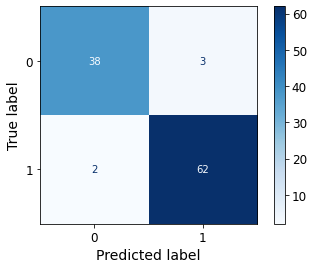

In [65]:
Evaluation_metrics(best_svm_nonlin,'SVM')

***c:What performs best on this dataset? Linear or non-linear models?***


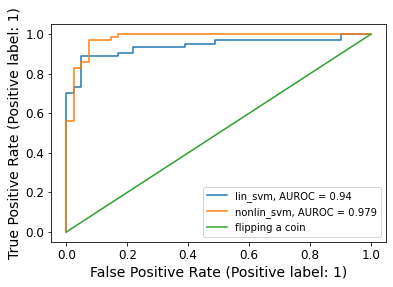

In [66]:
#compare the classifiers according to AUROC
classifiers = [best_svm_lin, best_svm_nonlin]
roc_score = []
plt.figure()
ax = plt.gca()
for clf in classifiers:
    plot_roc_curve(clf, x_test, y_test, ax=ax)
    roc_score.append(np.round_(roc_auc_score(y_test, clf.predict_proba(x_test)[:,1]), decimals=3))
ax.plot(np.linspace(0,1,x_test.shape[0]),np.linspace(0,1,x_test.shape[0]))
plt.legend(('lin_svm, AUROC = '+str(roc_score[0]),'nonlin_svm, AUROC = '+str(roc_score[1]),'flipping a coin'))

For a perfect classifier the ROC curve will go straight up the Y axis and then along the X axis, and it has an AUC of 1.
As we can see the non-linear classifier has an AUC of 0.979, and the linear classifier has an AUC of 0.94, so non-linear classifier is clearly better.

#### **6. Feature Selection**

***Training a Random Forest on our data***

Sensitivity is 0.92
Specificity is 0.90
PPV is 0.94
NPV is 0.88
Accuracy is 0.91
F1 is 0.93
LOSS is 0.17
AUROC is 0.973


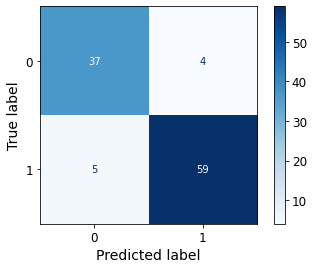

In [67]:
#statistics and plot the confusion matrix using random forest 

rfc = Pipeline(steps=[('scale', StandardScaler()), ('rfc', RandomForestClassifier(max_depth=4, random_state=0, criterion='gini'))])
rfc.fit(x_train, y_train)
Evaluation_metrics(rfc,'rf')

***i. What are the 2 most important features according to the random forest.***

***ii. Does this match up exactly with the feature exploration you did?***

In [68]:
# feature importance
clf = RandomForestClassifier(max_depth=4, random_state=0, criterion='gini')
clf.fit(x_train, y_train)
feat_labels=x_train.columns.values
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature) #all the importance scores add up to 100%

('Age', 0.03437327267054384)
('Gender', 0.09990826471603767)
('Increased Urination', 0.2726068764096129)
('Increased Thirst', 0.24920920809079114)
('Sudden Weight Loss', 0.07581164968463681)
('Weakness', 0.013655686691448678)
('Increased Hunger', 0.025668169114907293)
('Genital Thrush', 0.010231145468569212)
('Visual Blurring', 0.020720053891816723)
('Itching', 0.019463998157159445)
('Irritability', 0.033025993884122036)
('Delayed Healing', 0.01614414170798519)
('Partial Paresis', 0.07792904951969241)
('Muscle Stiffness', 0.011512684886229262)
('Hair Loss', 0.02857810865784822)
('Obesity', 0.00910393168310609)
('Family History', 0.0020577647654932934)


the 2 most important features according to the random forest are ***increased urination-27.26% & increased thirst-24.92%***, as we saw in the feature exploration.

**7.Data Separability Visualization**

In [69]:
def plt_2d_pca(X_pca,y,A):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title(A)

***a. Perform dimensionality reduction on the dataset so that you can plot your data in a
2d plot (show samples with positive and negative labels in different colors).***

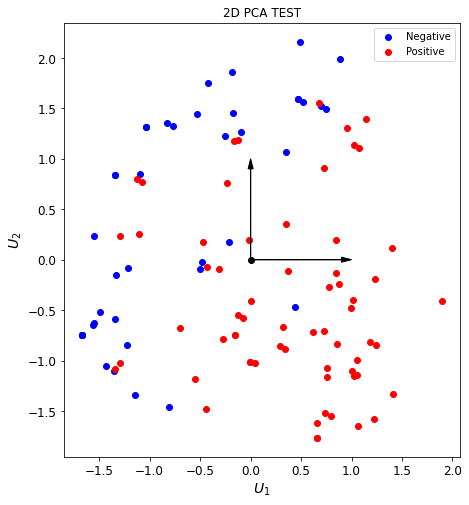

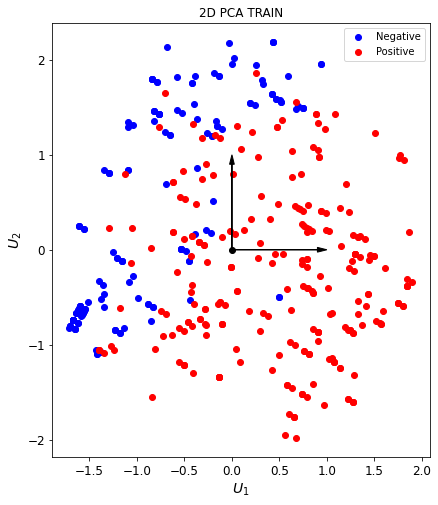

In [71]:
scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.transform(x_test)

n_components = 2
pca=PCA(n_components,whiten=True)
x_train_pca=pca.fit_transform(x_train_scaled)
x_test_pca=pca.transform(x_test_scaled)

plt_2d_pca(x_test_pca,y_test,'2D PCA TEST')
plt_2d_pca(x_train_pca,y_train, '2D PCA TRAIN')

***b. How separable is your data when reduced to just two features?***

***c. Train the same models above on the dimensionality-reduced training set.***

In [72]:
#Linear SVM calssifier

n_splits=5
skf=StratifiedKFold(n_splits=n_splits,random_state=10, shuffle=True) #n_splits=default(5)
svc = SVC(probability=True)
C = np.array([0.001, 0.01, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_lin_pca = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['linear']},cv=skf,
                       scoring=['accuracy','f1','precision','recall','roc_auc'], 
                       refit='roc_auc', verbose=3, return_train_score=True)
svm_lin_pca.fit(x_train_pca,y_train)

#best linear model
best_svm_lin_pca = svm_lin_pca.best_estimator_
print(svm_lin_pca.best_params_)

#performances as a function of missclassification penalties
#clf_type = ['linear']
#plot_radar(svm_lin_pca,clf_type)



Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.614, test=0.619) f1: (train=0.761, test=0.765) precision: (train=0.614, test=0.619) recall: (train=1.000, test=1.000) roc_auc: (train=0.929, test=0.965) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.614, test=0.619) f1: (train=0.761, test=0.765) precision: (train=0.614, test=0.619) recall: (train=1.000, test=1.000) roc_auc: (train=0.936, test=0.935) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.617, test=0.607) f1: (train=0.763, test=0.756) precision: (train=0.617, test=0.607) recall: (train=1.000, test=1.000) roc_auc: (train=0.950, test=0.892) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.615, test=0.614) f1: (train=0.762, test=0.761) precision: (train=0.615, test=0.614) recall: (train=1.000, test=1.000) roc_auc: (train=0.938, test=0.945) total t

In [73]:
#Nonlinear SVM calssifier

svc = SVC(probability=True)
C = np.array([1, 100, 1000, 10, 100, 1000])

pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_nonlin_pca = GridSearchCV(estimator=pipe, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'],
                                                      'svm__gamma': ['auto', 'scale']},
                       scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                       refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin_pca.fit(x_train_pca, y_train)

#best estimator
best_svm_nonlin_pca = svm_nonlin_pca.best_estimator_
print(svm_nonlin_pca.best_params_)

'''
#The performances as a function of missclassification penalties for different kernels and  𝛾
clf_type = ['rbf', 'scale']
plot_radar(svm_nonlin, clf_type)
clf_type = ['poly', 'scale']
plot_radar(svm_nonlin, clf_type)
'''

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END svm__C=1, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.904, test=0.917) f1: (train=0.921, test=0.931) precision: (train=0.930, test=0.959) recall: (train=0.912, test=0.904) roc_auc: (train=0.952, test=0.948) total time=   0.0s
[CV 2/5] END svm__C=1, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.898, test=0.881) f1: (train=0.916, test=0.902) precision: (train=0.930, test=0.920) recall: (train=0.902, test=0.885) roc_auc: (train=0.949, test=0.959) total time=   0.0s
[CV 3/5] END svm__C=1, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.928, test=0.833) f1: (train=0.941, test=0.857) precision: (train=0.946, test=0.894) recall: (train=0.937, test=0.824) roc_auc: (train=0.958, test=0.899) total time=   0.0s
[CV 4/5] END svm__C=1, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.896, test=0.904) f1: (train=0.914, test=0.920) precision: (train=0.925, test=0.939) recall: (train=0.903, test=0.902) 

"\n#The performances as a function of missclassification penalties for different kernels and  𝛾\nclf_type = ['rbf', 'scale']\nplot_radar(svm_nonlin, clf_type)\nclf_type = ['poly', 'scale']\nplot_radar(svm_nonlin, clf_type)\n"

Sensitivity is 0.84
Specificity is 0.76
PPV is 0.84
NPV is 0.76
Accuracy is 0.81
F1 is 0.84
LOSS is 0.38
AUROC is 0.902


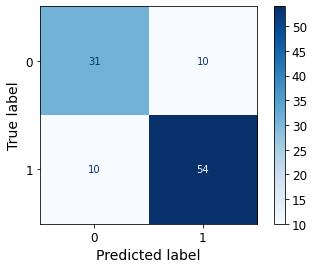

In [76]:
Evaluation_metrics(best_svm_lin_pca,method='lin_SVM',d=x_test_pca)

Sensitivity is 0.91
Specificity is 0.78
PPV is 0.87
NPV is 0.84
Accuracy is 0.86
F1 is 0.89
LOSS is 0.29
AUROC is 0.911


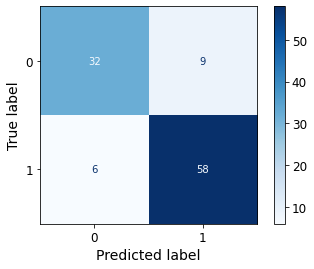

In [78]:
Evaluation_metrics(best_svm_nonlin_pca,method='lin_SVM',d=x_test_pca)

***d. Train the same models on the best two features from section 6.***

In [ ]:
Evaluation_metrics(best_svm_nonlin_pca,method='lin_SVM',d=clf)

***e. What performs better? 2 features of the reduced dimensionality.***

we expect to get better results for the reduced dimentionality because:
in PCA we find the two orthogonal vectors that carries the most information of the data, and are a linear combination of all features.
and in best 2 features we choose the vectors to be 2 features. 
but because PCA should be performed on a contineuos data and not binary data and our data is mostly consisted of binary data, with an additional feature that is contineous so it adds some distribution to the data and adds variance. The reason is that the algorithm seeks to maximize the variance. And the variance of a binary data is not as meaningful.However, since the data is mostly binary, using PCA is a bit problematic. Looking at our results, we can see that in terms of Sensitivity, Specificity, PPV, NPV, Accuracy and F1, the results were not consistent. In some parameters PCA gave better results, while on others, best 2 features gave better results. In terms of AUROC, the PCA performed better.